In [1]:
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import calendar

data = pd.read_csv('Desktop\Red_Light_Camera_Violations.csv').fillna(0)
data['Weekday'] = pd.to_datetime(data['VIOLATION DATE'])
data['Weekday'] = data['Weekday'].dt.weekday

data.describe() 
data.info()

# 783053 data rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783053 entries, 0 to 783052
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   INTERSECTION    783053 non-null  object 
 1   CAMERA ID       783053 non-null  float64
 2   ADDRESS         783053 non-null  object 
 3   VIOLATION DATE  783053 non-null  object 
 4   VIOLATIONS      783053 non-null  int64  
 5   X COORDINATE    783053 non-null  float64
 6   Y COORDINATE    783053 non-null  float64
 7   LATITUDE        783053 non-null  float64
 8   LONGITUDE       783053 non-null  float64
 9   LOCATION        783053 non-null  object 
 10  Weekday         783053 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 65.7+ MB


In [2]:
print(data.isna().sum())
print(data.isnull().sum())
print(data['VIOLATIONS'].sum())
#there are no null or nan values in each column 

INTERSECTION      0
CAMERA ID         0
ADDRESS           0
VIOLATION DATE    0
VIOLATIONS        0
X COORDINATE      0
Y COORDINATE      0
LATITUDE          0
LONGITUDE         0
LOCATION          0
Weekday           0
dtype: int64
INTERSECTION      0
CAMERA ID         0
ADDRESS           0
VIOLATION DATE    0
VIOLATIONS        0
X COORDINATE      0
Y COORDINATE      0
LATITUDE          0
LONGITUDE         0
LOCATION          0
Weekday           0
dtype: int64
4691134


In [3]:
data['VIOLATION DATE'].min()
# 01/01/2015
data['VIOLATION DATE'].max()
# 12/31/2021
year = [ el.split('/')[2] for el in data['VIOLATION DATE']]
month = [ el.split('/')[0] for el in data['VIOLATION DATE']]
day = [ el.split('/')[1] for el in data['VIOLATION DATE']]

data['Year'] = year
data['Month'] = month
data['Day'] = day

#drop the violation date as column because we added the year,month and day one
#drop the location because is a repetition of the latitude and longitude
data = data.drop(['VIOLATION DATE','LOCATION'],axis=1)

In [4]:
print((data['X COORDINATE'] != 0).sum())
# 40921 violations have the relative position, for this reason we exclude the data with no geographical reference

data = data.loc[data['X COORDINATE'] != 0,:]

742132


In [5]:
violations_per_camera = data.groupby('CAMERA ID').sum().sort_values(by='VIOLATIONS',ascending=False)
violations_per_camera = violations_per_camera.iloc[:,0]
print(violations_per_camera)
l=[]
for el in data.loc[:,'CAMERA ID']: 
    l.append(violations_per_camera.loc[el])
data['TotalViolations'] = l

CAMERA ID
1413.0    151608
2251.0    150855
2052.0     86780
2654.0     81485
2503.0     79638
           ...  
1062.0       169
2174.0       160
8313.0        22
8304.0         7
2054.0         1
Name: VIOLATIONS, Length: 347, dtype: int64


In [6]:
#definition of the geometry
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(data['LONGITUDE'],data['LATITUDE'])]

In [21]:
#definition of Chicago map and GeoDataFrame
street_map = gpd.read_file('Desktop\Boundaries - ZIP Codes')
gdf = gpd.GeoDataFrame(data, crs={'init':'epsg:4326'}, geometry=geometry)
print(street_map)

C:\Users\davib\anaconda3\envs\geo\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


    objectid    shape_area     shape_len    zip  \
0       33.0  1.060523e+08  42720.044406  60647   
1       34.0  1.274761e+08  48103.782721  60639   
2       35.0  4.506904e+07  27288.609612  60707   
3       36.0  7.085383e+07  42527.989679  60622   
4       37.0  9.903962e+07  47970.140153  60651   
..       ...           ...           ...    ...   
56      57.0  1.552855e+08  53406.915617  60623   
57      58.0  2.111148e+08  58701.325375  60629   
58      59.0  2.116961e+08  58466.160298  60620   
59      60.0  1.254243e+08  52377.854541  60637   
60      61.0  1.678720e+08  53040.907078  60619   

                                             geometry  
0   POLYGON ((-87.67762 41.91776, -87.67761 41.917...  
1   POLYGON ((-87.72683 41.92265, -87.72693 41.922...  
2   POLYGON ((-87.78500 41.90915, -87.78531 41.909...  
3   POLYGON ((-87.66707 41.88885, -87.66707 41.888...  
4   POLYGON ((-87.70656 41.89555, -87.70672 41.895...  
..                                                .

<AxesSubplot:>

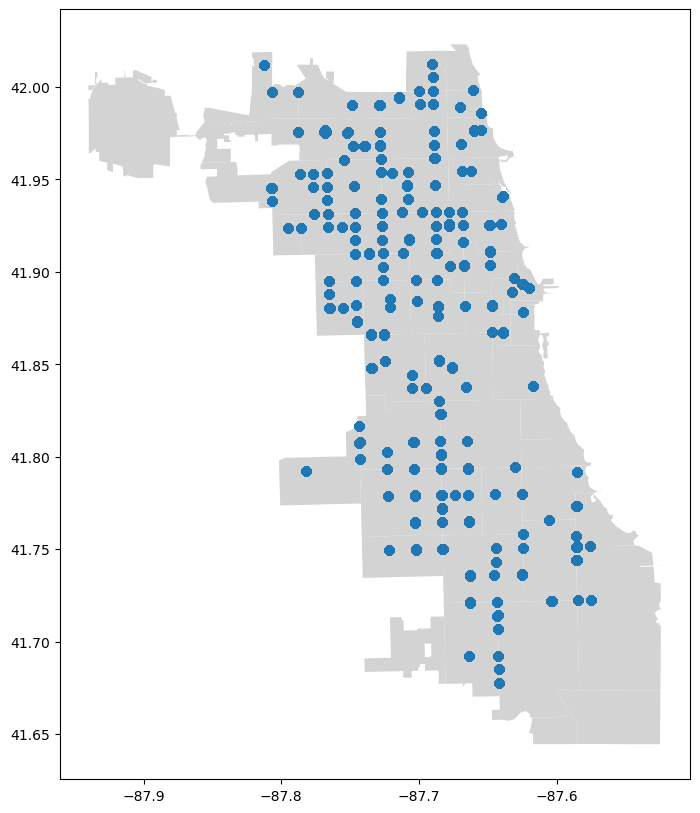

In [22]:
#distribution of the sensors in the city 
fig, ax = plt.subplots(figsize = (10,10))
street_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax)

<AxesSubplot:>

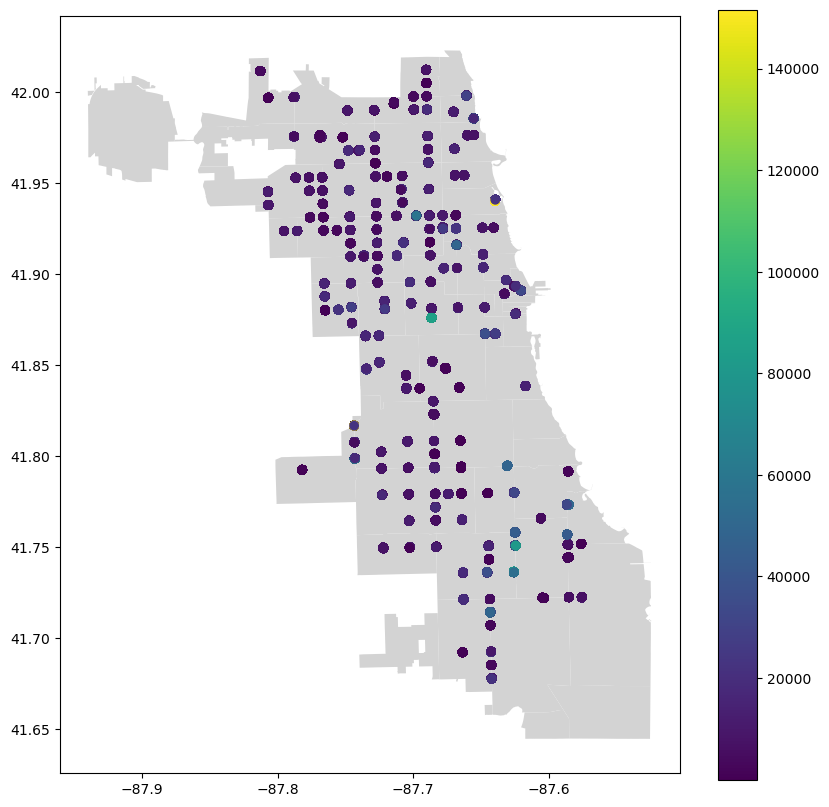

In [23]:
fig, ax = plt.subplots(figsize = (10,10))
street_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
gdf.plot('TotalViolations',ax=ax,legend=True)


Text(0.5, 1.0, ' Total Violations for the years 2019 - 2021')

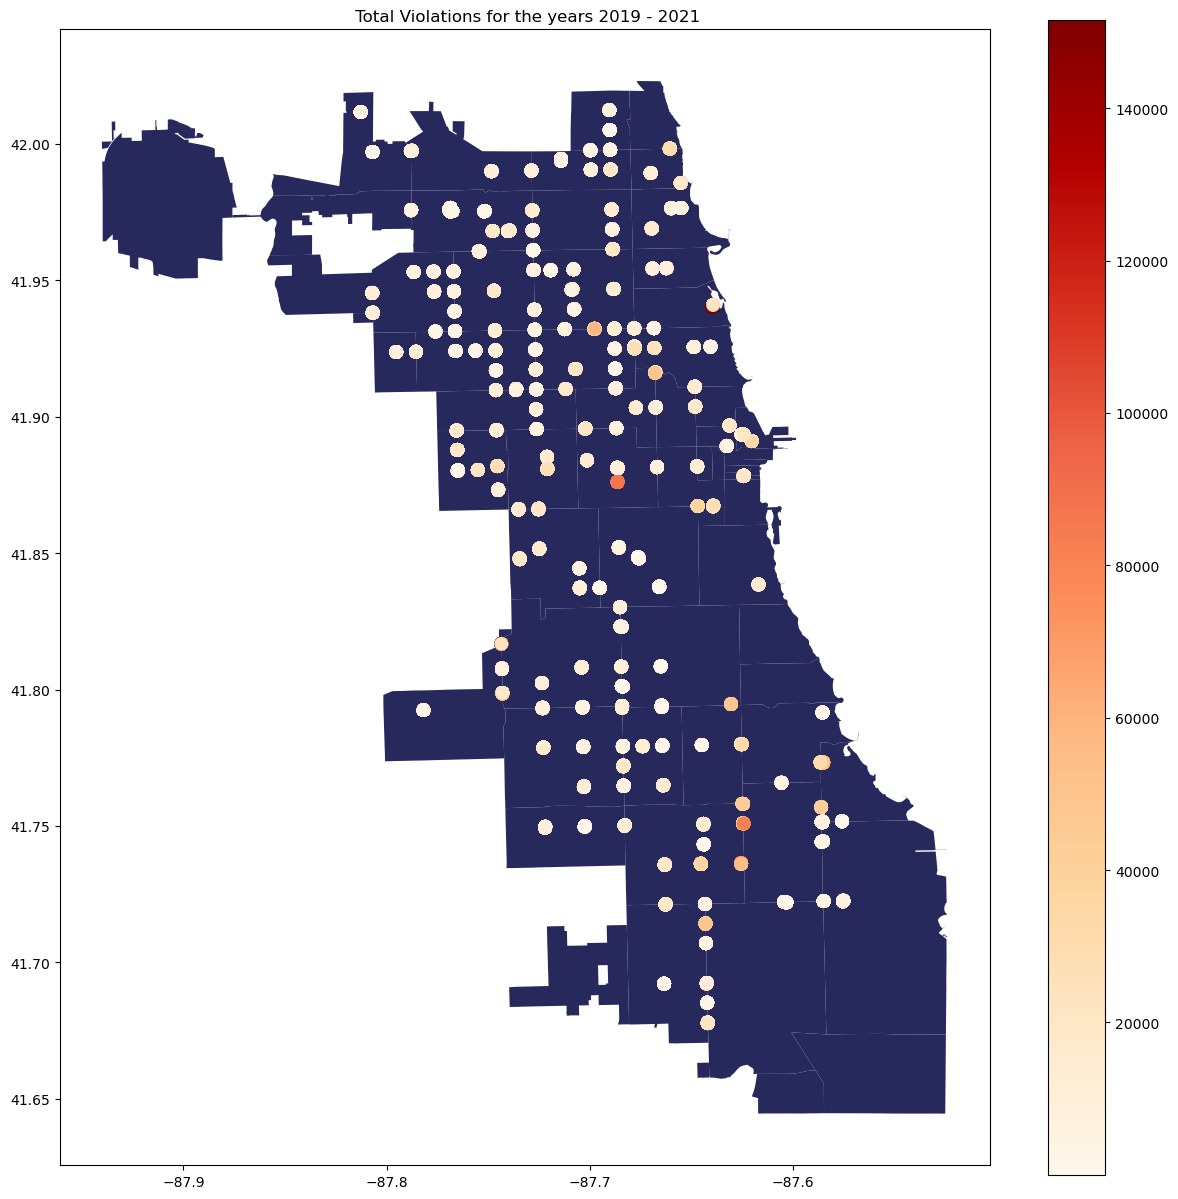

In [24]:
#plot of violations between 2019 and 2021
fig, ax = plt.subplots(figsize = (15,15))
street_map.to_crs(epsg=4326).plot(ax=ax, color='#27285C')
gdf.plot('TotalViolations',ax=ax,cmap='OrRd',markersize=80, legend=True)
plt.title(' Total Violations for the years 2019 - 2021')


In [25]:
ZeroDivisionError#Suppose 
data2019 = data[data['Year'] =='2019']
data2020 = data[data['Year'] =='2020']
data2021 = data[data['Year'] =='2021']

violations_per_camera_2019 = data2019.groupby(['Month']).sum().sort_values(by='Month',ascending=True)
violations_per_camera_2020 = data2020.groupby(['Month']).sum().sort_values(by='Month',ascending=True)
violations_per_camera_2021 = data2021.groupby(['Month']).sum().sort_values(by='Month',ascending=True)



In [26]:
print(violations_per_camera_2020)

        CAMERA ID  VIOLATIONS  X COORDINATE  Y COORDINATE       LATITUDE  \
Month                                                                      
01     13424143.0       30846  8.244855e+09  1.353512e+10  298361.431545   
02     12636958.0       32583  7.814156e+09  1.283083e+10  282751.773588   
03     13630579.0       33200  8.350243e+09  1.370165e+10  302118.474161   
04     13300692.0       31570  8.134463e+09  1.335329e+10  294415.750478   
05     13989835.0       40924  8.538029e+09  1.401425e+10  309026.482773   
06     14044717.0       54529  8.638231e+09  1.418026e+10  312635.437689   
07     14624529.0       54482  8.986248e+09  1.474875e+10  325195.678300   
08     14344512.0       55641  8.822280e+09  1.448446e+10  319263.630860   
09     14143302.0       52147  8.709448e+09  1.430135e+10  315241.123067   
10     14855639.0       50190  9.121833e+09  1.497101e+10  330095.689305   
11     13897899.0       41902  8.496362e+09  1.393917e+10  307390.345271   
12     14012

C:\Users\davib\anaconda3\envs\geo\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Text(0.5, 1.0, ' Total Violations for the year of 2019')

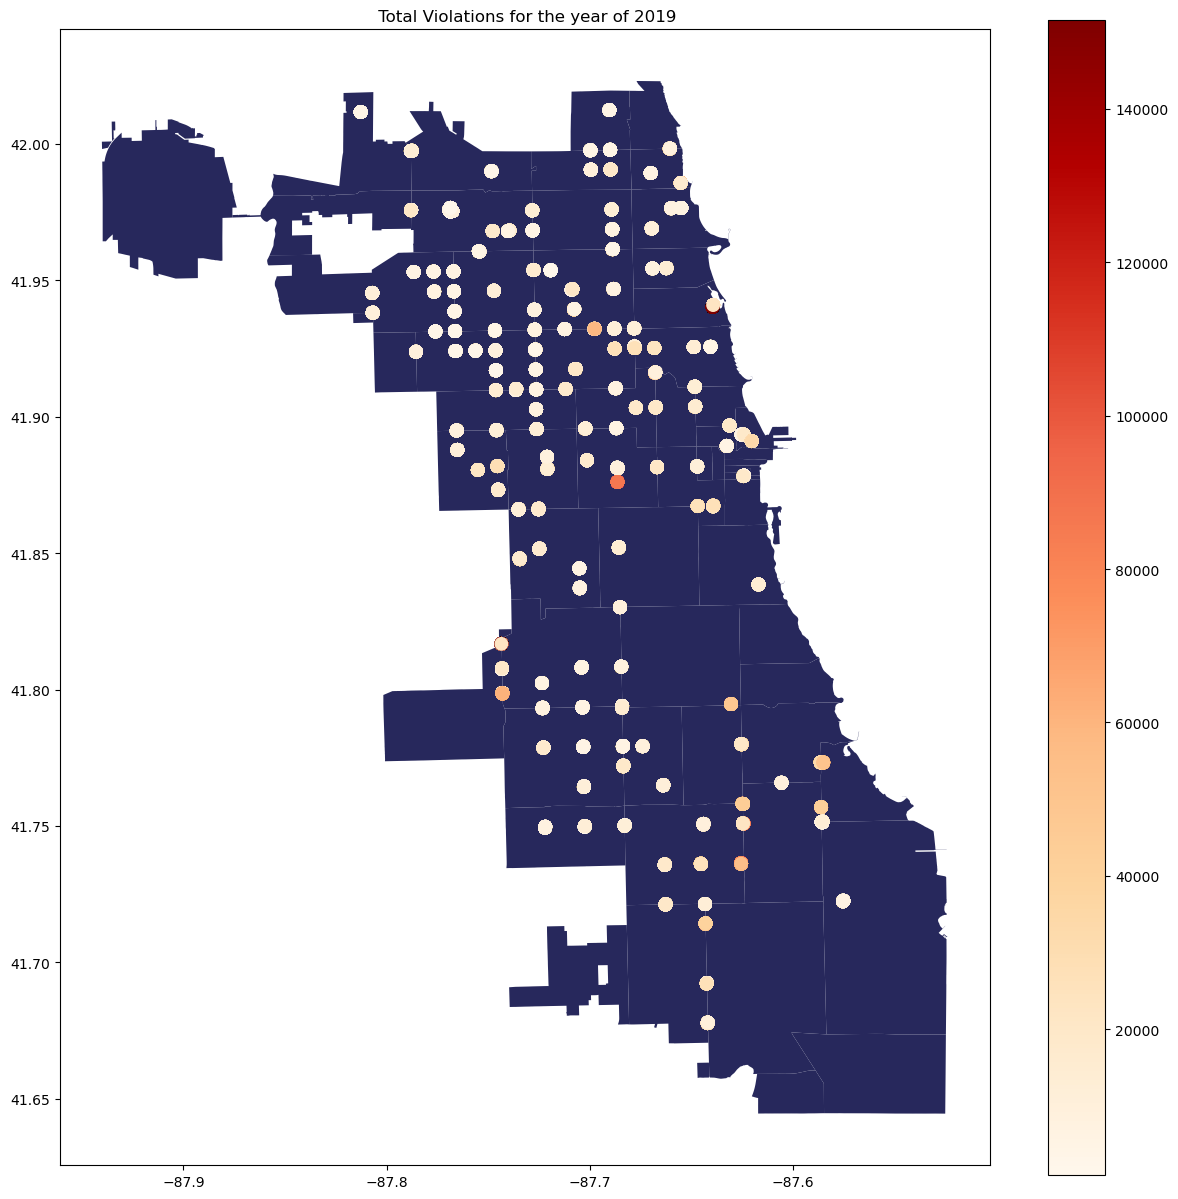

In [35]:
#plot of 2019
geometry19 = [Point(xy) for xy in zip(data2019['LONGITUDE'],data2019['LATITUDE'])]
gdf2019 = gpd.GeoDataFrame(data2019, crs={'init':'epsg:4326'}, geometry=geometry19)
fig, ax = plt.subplots(figsize = (15,15))
street_map.to_crs(epsg=4326).plot(ax=ax, color='#27285C')
gdf2019.plot('TotalViolations',ax=ax,cmap='OrRd',markersize=80, legend=True)
plt.title(' Total Violations for the year of 2019')

C:\Users\davib\anaconda3\envs\geo\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Text(0.5, 1.0, ' Total Violations for the year of 2020')

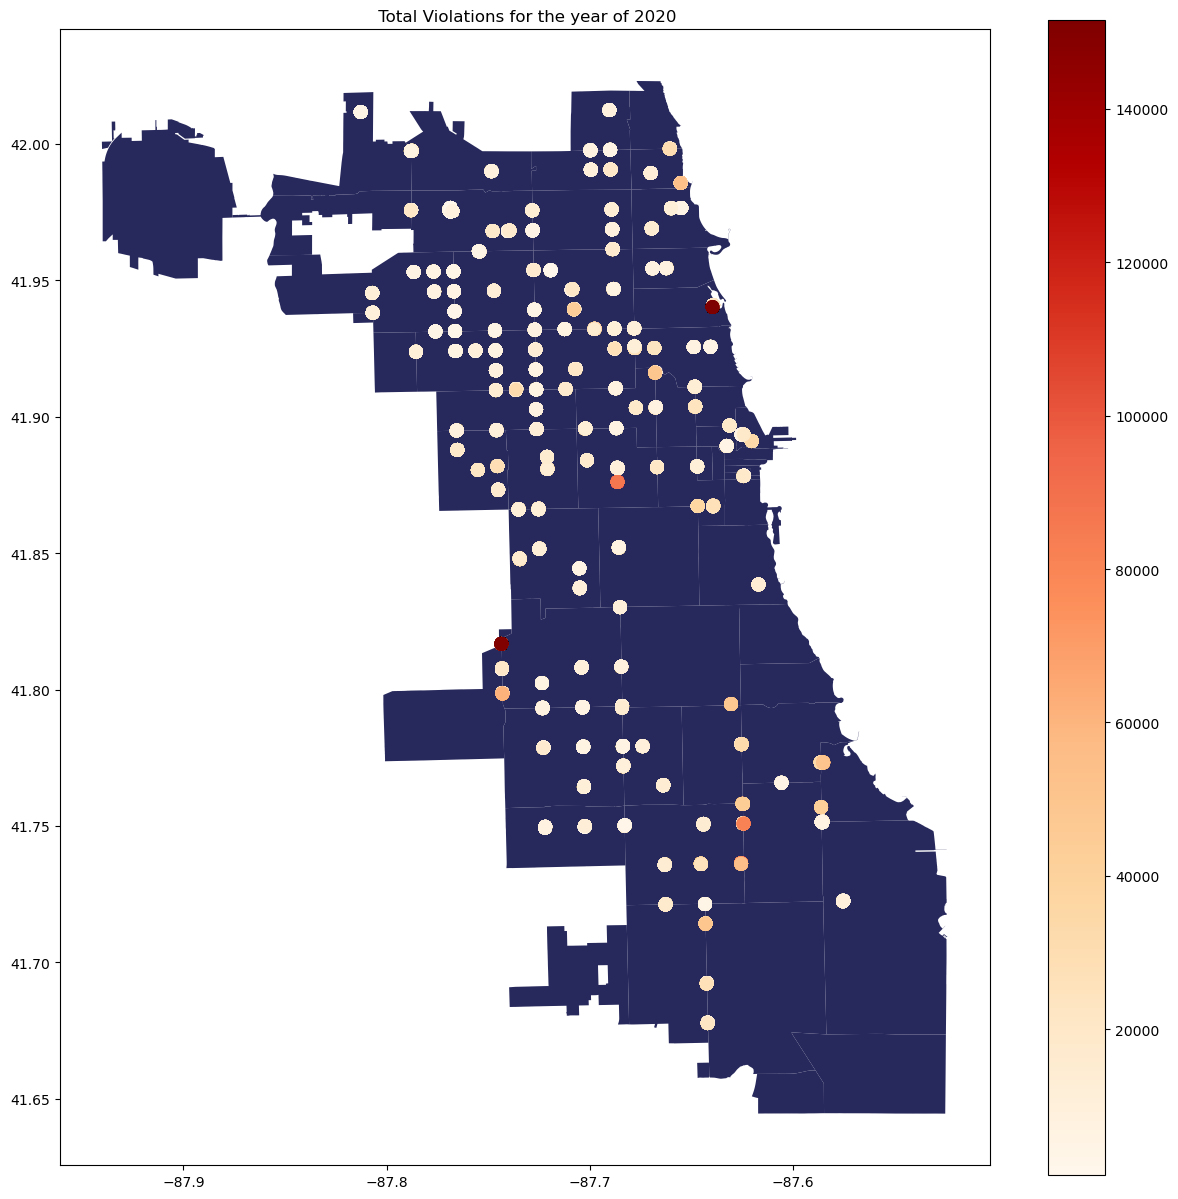

In [27]:
#plot of 2020
geometry20 = [Point(xy) for xy in zip(data2020['LONGITUDE'],data2020['LATITUDE'])]
gdf2020 = gpd.GeoDataFrame(data2020, crs={'init':'epsg:4326'}, geometry=geometry20)
fig, ax = plt.subplots(figsize = (15,15))
street_map.to_crs(epsg=4326).plot(ax=ax, color='#27285C')
gdf2020.plot('TotalViolations',ax=ax,cmap='OrRd',markersize=80, legend=True)
plt.title(' Total Violations for the year of 2020')

C:\Users\davib\anaconda3\envs\geo\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Text(0.5, 1.0, ' Total Violations for the year of 2021')

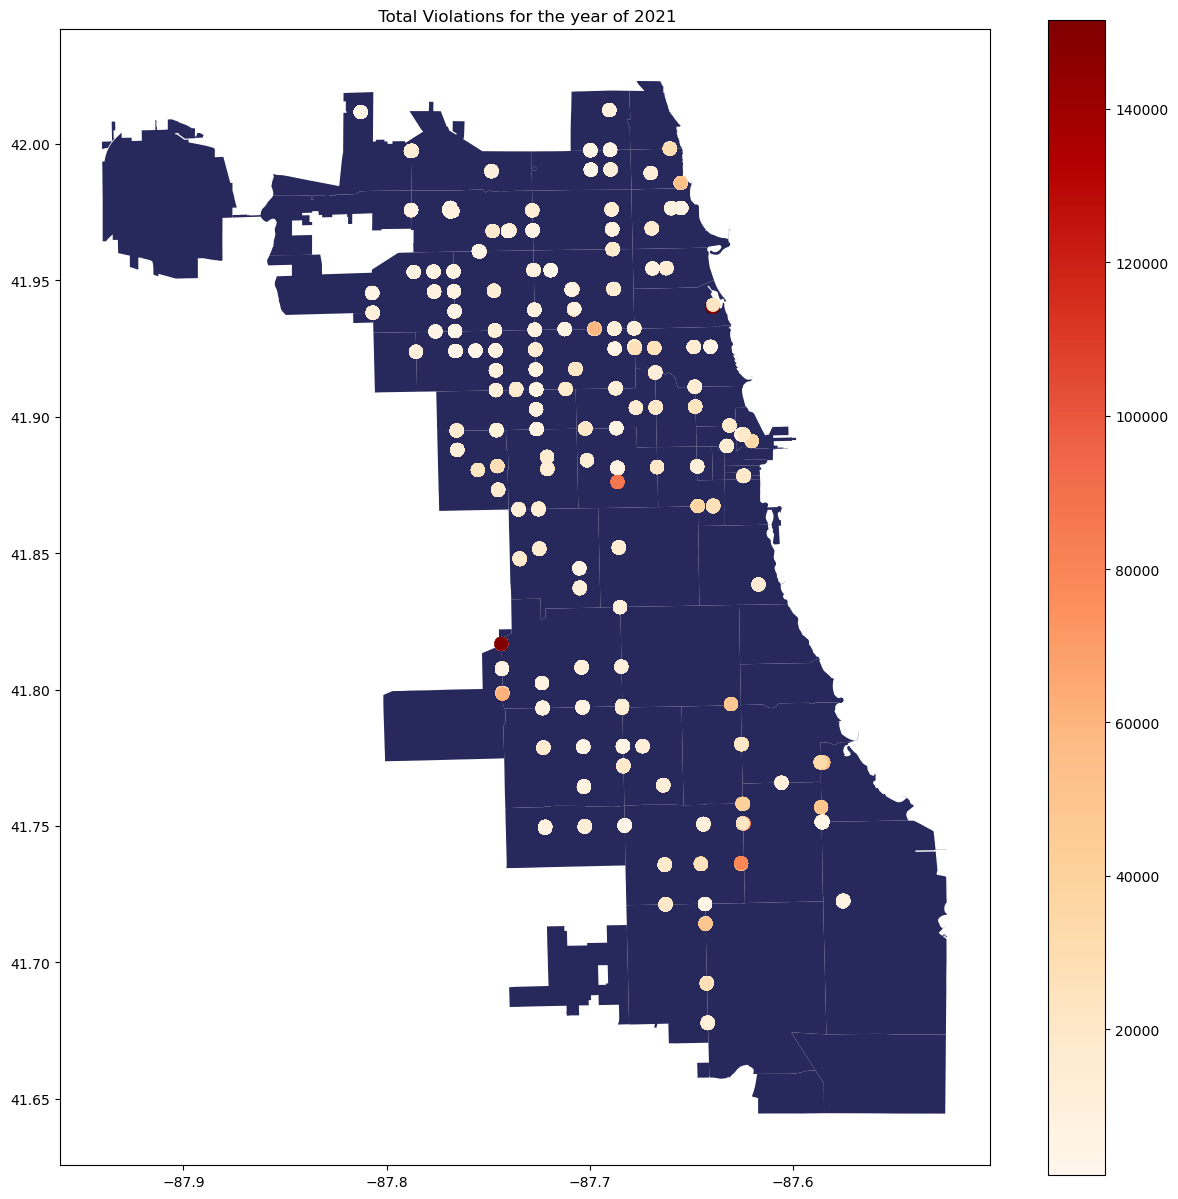

In [28]:
#plot of 2021
geometry21 = [Point(xy) for xy in zip(data2021['LONGITUDE'],data2021['LATITUDE'])]
gdf2021 = gpd.GeoDataFrame(data2021, crs={'init':'epsg:4326'}, geometry=geometry21)
fig, ax = plt.subplots(figsize = (15,15))
street_map.to_crs(epsg=4326).plot(ax=ax, color='#27285C')
gdf2021.plot('TotalViolations',ax=ax,cmap='OrRd',markersize=80,legend=True)
plt.title(' Total Violations for the year of 2021')

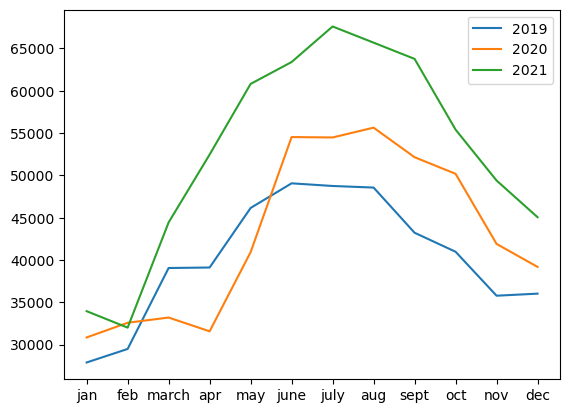

In [29]:
#comparison between three different years
months = ['jan','feb','march','apr','may','june','july','aug','sept','oct','nov','dec']
plt.plot(months,violations_per_camera_2019['VIOLATIONS'])
plt.plot(months,violations_per_camera_2020['VIOLATIONS'])
plt.plot(months,violations_per_camera_2021['VIOLATIONS'])
plt.legend(['2019','2020','2021'])

In [30]:
#Suppose 
#data2019_2021 = data
violations_per_camera_DOW = data.groupby(['Weekday']).sum().sort_values(by='Weekday',ascending=True)
print(violations_per_camera_DOW)

           CAMERA ID  VIOLATIONS  X COORDINATE  Y COORDINATE      LATITUDE  \
Weekday                                                                      
0        195322701.0      569408  1.207715e+11  1.981706e+11  4.369950e+06   
1        196079708.0      572109  1.213054e+11  1.990591e+11  4.389438e+06   
2        197220715.0      583556  1.220391e+11  2.002544e+11  4.415782e+06   
3        198615827.0      608602  1.229523e+11  2.017700e+11  4.449055e+06   
4        201622958.0      666923  1.248700e+11  2.049275e+11  4.518588e+06   
5        201508416.0      712239  1.247412e+11  2.047166e+11  4.514013e+06   
6        197632141.0      655706  1.222317e+11  2.005828e+11  4.423101e+06   

            LONGITUDE  TotalViolations  
Weekday                                 
0       -9.150975e+06       1655938718  
1       -9.191770e+06       1660625562  
2       -9.246911e+06       1668210657  
3       -9.316564e+06       1675327629  
4       -9.462155e+06       1689187386  
5       -9

Text(0.5, 1.0, 'Comparison between the days of the week')

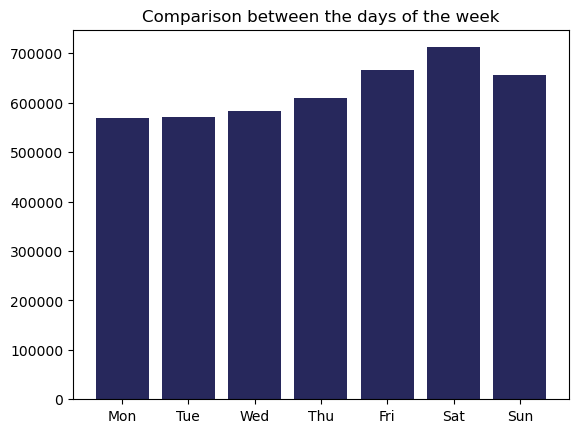

In [31]:
#comparison betwwn day of the week
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.bar(days,violations_per_camera_DOW['VIOLATIONS'], color='#27285C')
plt.title("Comparison between the days of the week")

(500000.0, 747850.95)

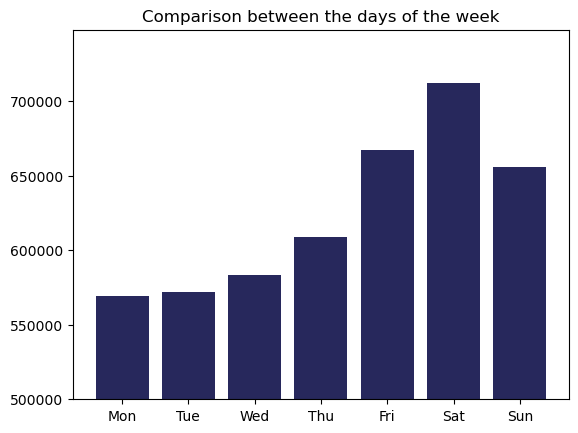

In [32]:
#Bottom of Y limit scaled up to 50000 to show the difference
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
plt.bar(days,violations_per_camera_DOW['VIOLATIONS'], color='#27285C')
plt.title("Comparison between the days of the week")
plt.ylim(bottom=500000)

In [33]:
#seasons = [1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1]
Seas = ['Winter', 'Spring', 'Summer', 'Fall']
data['Season'] = (data['Month'].astype(int))%12 // 3 + 1

          CAMERA ID  VIOLATIONS  X COORDINATE  Y COORDINATE      LATITUDE  \
Season                                                                      
1       326304170.0      853250  2.012639e+11  3.301776e+11  7.281649e+06   
2       340816851.0     1054788  2.108520e+11  3.460385e+11  7.630027e+06   
3       378695947.0     1389330  2.347795e+11  3.853476e+11  8.496364e+06   
4       342185498.0     1071175  2.120160e+11  3.479174e+11  7.671888e+06   

           LONGITUDE  Weekday  TotalViolations  
Season                                          
1      -1.524843e+07   524935       2782484039  
2      -1.597767e+07   549972       2898870650  
3      -1.779174e+07   610985       3157065206  
4      -1.606544e+07   552713       2862890730  


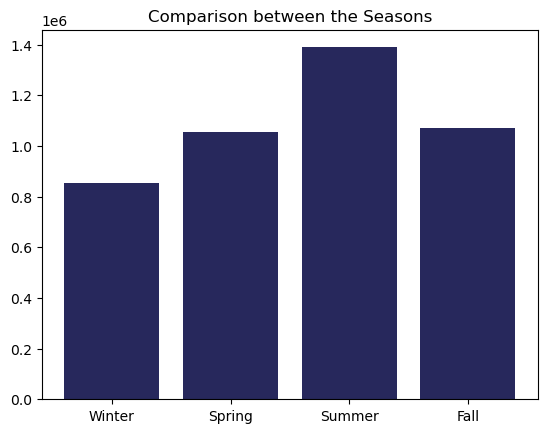

In [34]:
#comparison of violations between the seasons 
violations_per_camera_seasons_of_19_21 = data.groupby(['Season']).sum().sort_values(by='Season',ascending=True)
plt.bar(Seas,violations_per_camera_seasons_of_19_21['VIOLATIONS'], color='#27285C')
plt.title("Comparison between the Seasons")
print(violations_per_camera_seasons_of_19_21)